In [12]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as im
from moviepy.editor import VideoFileClip
from project import *
from thresholding import *

%matplotlib inline

### Camera Calibration

In [13]:
camera = Camera()

camera.calibrate("./camera_cal/*.jpg")

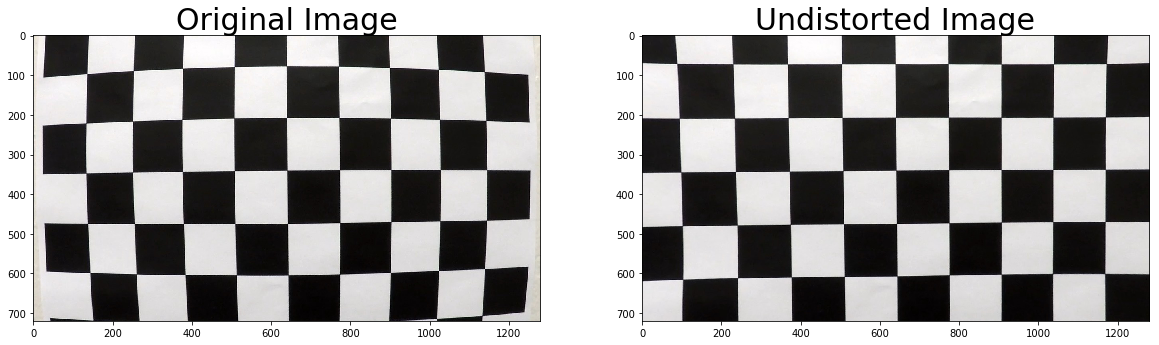

In [14]:
# Read test image
image = im.imread("camera_cal/calibration1.jpg")
dst   = camera.undistort(image)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [15]:
detection = LaneDetection(camera)


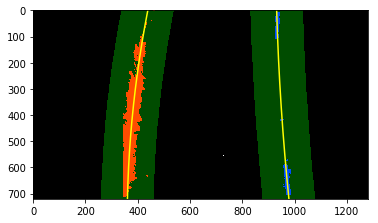

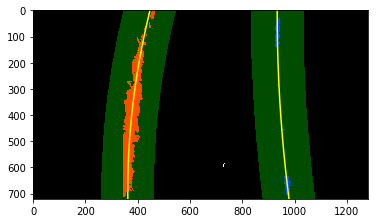

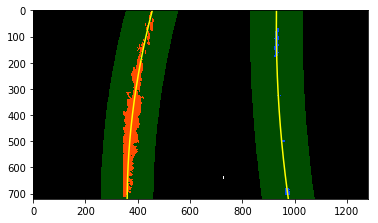

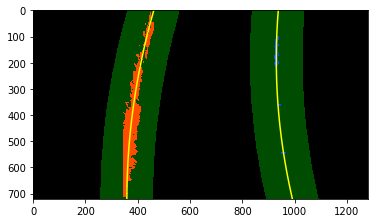

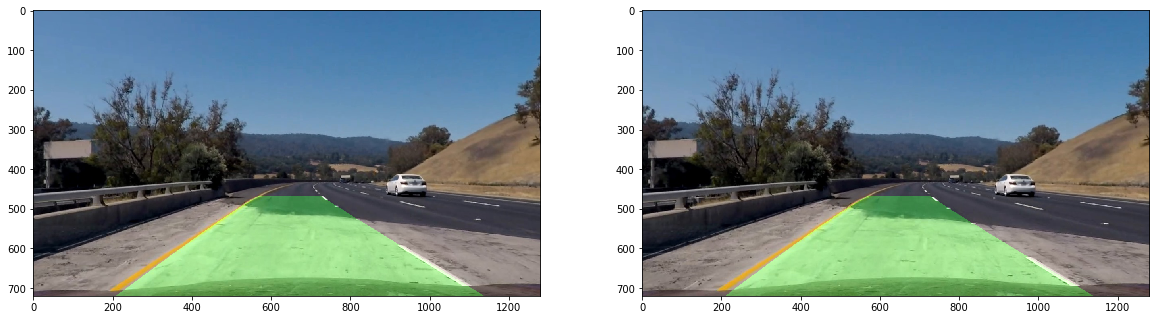

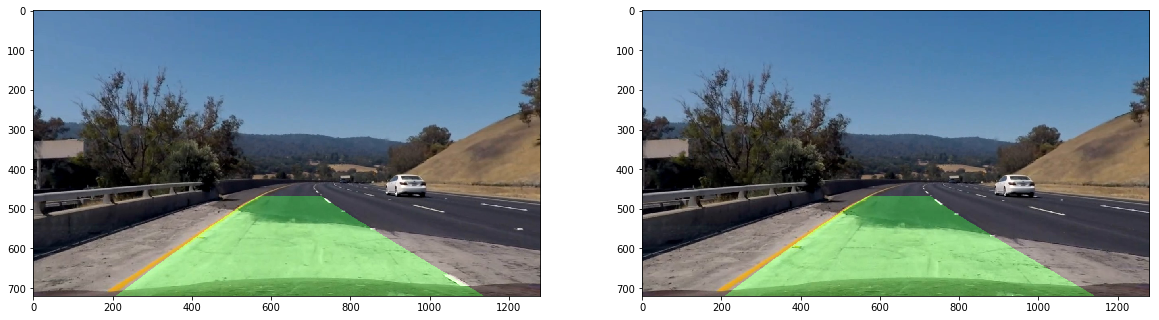

In [16]:
frame1 = plt.imread("./frame_611.jpg")
frame2 = plt.imread("./frame_612.jpg")
frame3 = plt.imread("./frame_613.jpg")
frame4 = plt.imread("./frame_614.jpg")

mframe1 = detection.mark_lane(frame1)
mframe2 = detection.mark_lane(frame2)
mframe3 = detection.mark_lane(frame3)
mframe4 = detection.mark_lane(frame4)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mframe1)
ax2.imshow(mframe2)

f, (ax3,ax4) = plt.subplots(1, 2, figsize=(20,10))
ax3.imshow(mframe3)
ax4.imshow(mframe4)

#binary_warped = gradients(frame1)
#histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
#plt.plot(histogram)



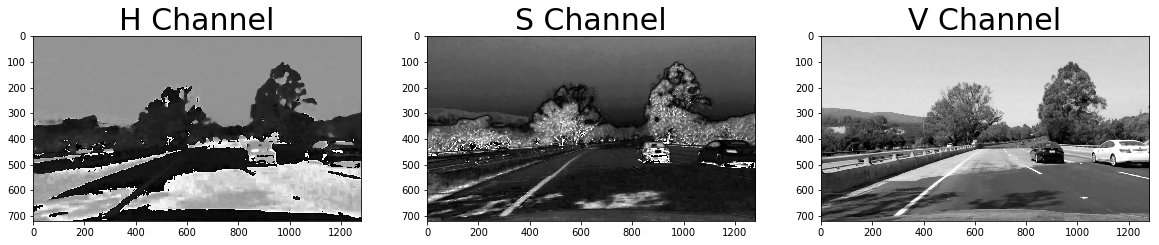

In [209]:
img = plt.imread('./test_images/test4.jpg')
img = detection.camera.undistort(img)
HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H   = HSV[:,:,0]
S   = HSV[:,:,1]
V   = HSV[:,:,2]


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(H, cmap='gray')
ax1.set_title('H Channel', fontsize=30)
ax2.imshow(S, cmap='gray')
ax2.set_title('S Channel', fontsize=30)
ax3.imshow(V, cmap='gray')
ax3.set_title('V Channel', fontsize=30)

(array([  42800.,   87278.,  106418.,  168590.,   75110.,   30751.,
         216766.,  165009.,   20348.,    8530.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

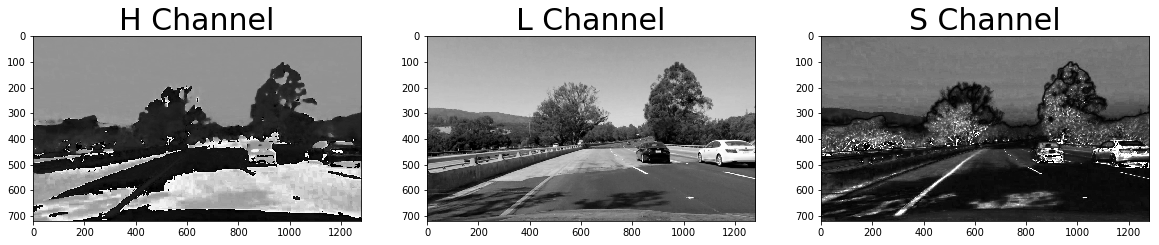

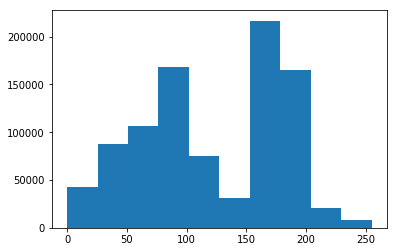

In [305]:
HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
H   = HLS[:,:,0]
L   = HLS[:,:,1]
S   = HLS[:,:,2]


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(H, cmap='gray')
ax1.set_title('H Channel', fontsize=30)
ax2.imshow(L, cmap='gray')
ax2.set_title('L Channel', fontsize=30)
ax3.imshow(S, cmap='gray')
ax3.set_title('S Channel', fontsize=30)

plt.figure()
plt.hist(L.reshape(L.shape[0]*L.shape[1]))


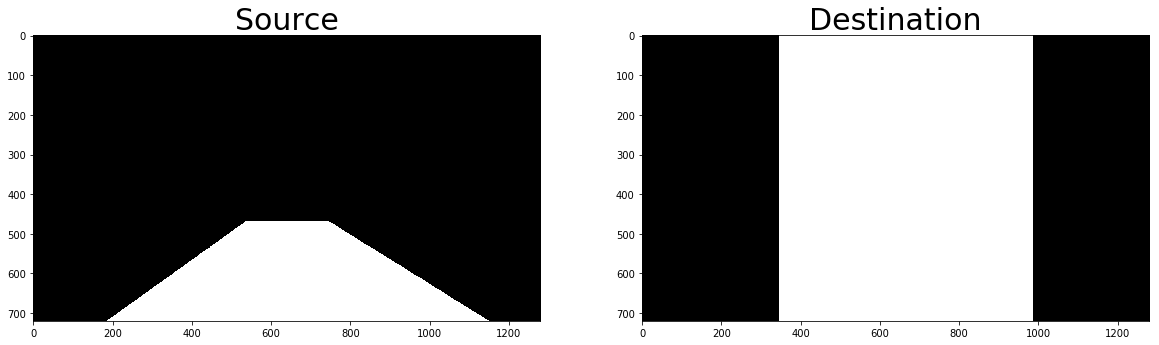

In [306]:
#(720, 1280)
def get_points(image):
    image_size = image.shape[0:2]
    height     = image_size[0]
    width      = image_size[1]

    src = np.array([[(width * 0.145, height), (width * 0.42, 0.65 * height), 
                     (0.582 * width, height * 0.65), (0.898 * width, height)]], dtype=np.int32)
    dst = np.array([[(0.27 * width, height), (0.27 * width, 0), 
                     (0.77 * width, 0), (0.77 * width, height)]], dtype=np.int32)
    return src, dst

src, dst = get_points(img)
bin_image = color_threshold(img, color=None, channel=0, thresh=(190, 255))
area1     = np.zeros_like(bin_image, dtype=np.uint8)
area2     = np.zeros_like(bin_image, dtype=np.uint8)

cv2.fillPoly(area1, src, 255)
cv2.fillPoly(area2, dst, 255)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(area1, cmap='gray')
ax1.set_title('Source', fontsize=30)
ax2.imshow(area2, cmap='gray')
ax2.set_title('Destination', fontsize=30)


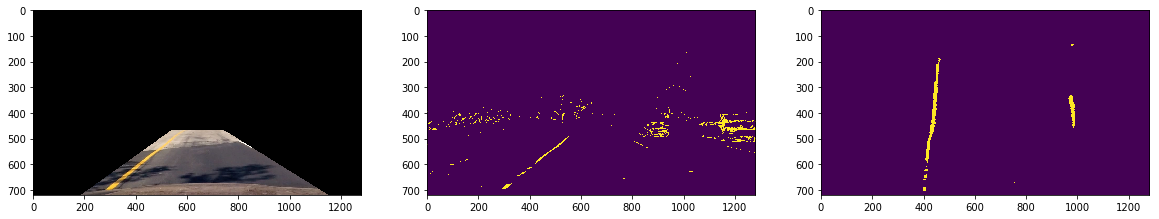

In [320]:
def get_perspective_transform(image_size, src, dst):
    src = np.float32(src)
    dst = np.float32(dst)

    M    = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    return M, Minv

def region_of_interest(binary_image, points):
    mask = np.zeros_like(binary_image, dtype=np.uint8)

    if len(binary_image.shape)  > 2:
        cv2.fillPoly(mask, points, (255,)*3)
    else:
        # Create mask interest region
        cv2.fillPoly(mask, points, 255)
    
    #plt.imshow(mask)

    # Mask area outside the 
    return cv2.bitwise_and(binary_image, mask)

image_size = img.shape[0:1]
M, Minv = get_perspective_transform(image_size, src, dst)

image_size    = (img.shape[1], img.shape[0])
v_image = color_threshold(img, color=cv2.COLOR_RGB2LAB, channel=2, thresh=(170, 128))
s_image = color_threshold(img, color=cv2.COLOR_RGB2HLS, channel=2, thresh=(220, 255))
bin_image = np.zeros_like(s_image)
bin_image[(s_image==1) | (g==1)] = 1
bin_image = region_of_interest(bin_image, src)
warped = cv2.warpPerspective(bin_image, M, image_size, flags=cv2.INTER_LINEAR)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(region_of_interest(img, src))
ax2.imshow(s_image)
ax3.imshow(warped)

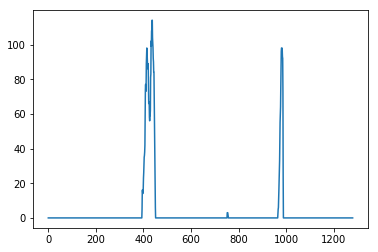

In [319]:
histogram = np.sum(warped[warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)

(array([  45911.,   65261.,   88920.,  180419.,  188843.,  166967.,
          96150.,   52106.,   24638.,   12385.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

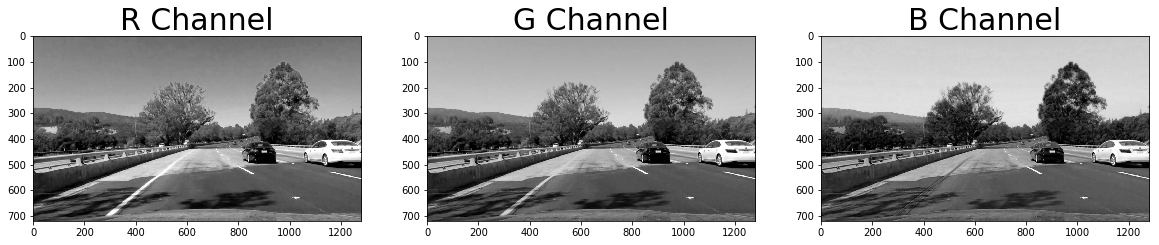

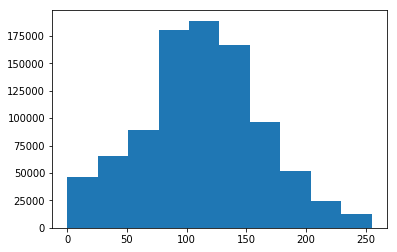

In [41]:
RGB = img
R   = RGB[:,:,0]
G   = RGB[:,:,1]
B   = RGB[:,:,2]


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(R, cmap='gray')
ax1.set_title('R Channel', fontsize=30)
ax2.imshow(G, cmap='gray')
ax2.set_title('G Channel', fontsize=30)
ax3.imshow(B, cmap='gray')
ax3.set_title('B Channel', fontsize=30)

plt.figure()
plt.hist(R.reshape(R.shape[0]*R.shape[1]))


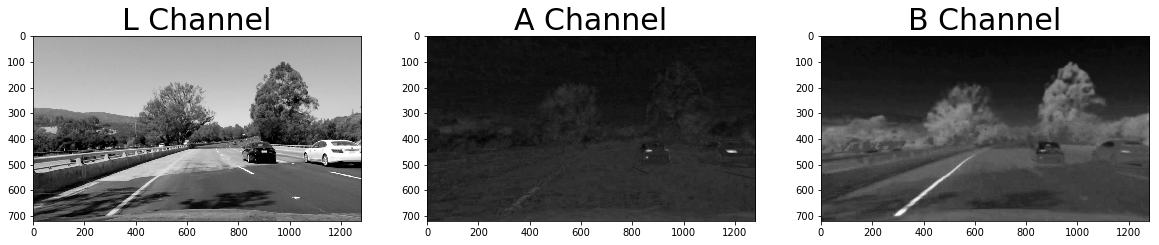

In [111]:
LAB = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
L   = LAB[:,:,0]
A   = LAB[:,:,1]
B   = LAB[:,:,2]


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(L, cmap='gray')
ax1.set_title('L Channel', fontsize=30)
ax2.imshow(A, cmap='gray')
ax2.set_title('A Channel', fontsize=30)
ax3.imshow(B, cmap='gray')
ax3.set_title('B Channel', fontsize=30)


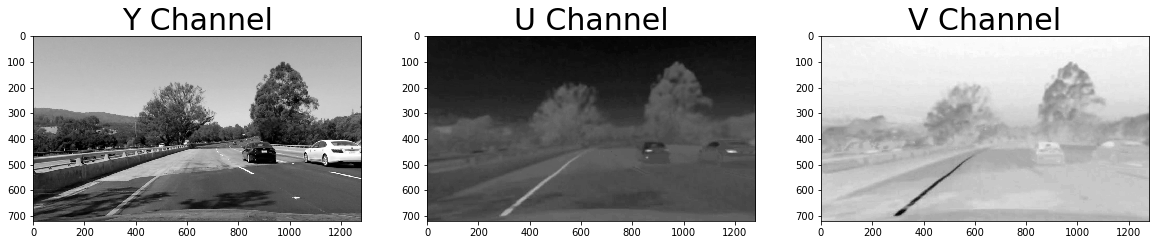

In [110]:
YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
Y   = YUV[:,:,0]
U   = YUV[:,:,1]
V   = YUV[:,:,2]


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(Y, cmap='gray')
ax1.set_title('Y Channel', fontsize=30)
ax2.imshow(U, cmap='gray')
ax2.set_title('U Channel', fontsize=30)
ax3.imshow(V, cmap='gray')
ax3.set_title('V Channel', fontsize=30)


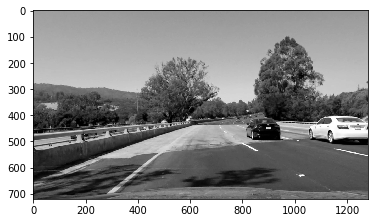

In [150]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(gray, cmap='gray')

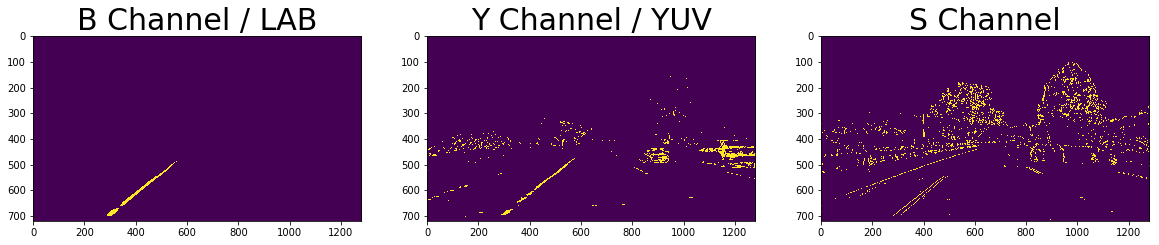

In [148]:
channel1 = color_threshold(img, color=cv2.COLOR_RGB2LAB,channel=2, thresh=(170, 255))
channel2 = color_threshold(img, color=cv2.COLOR_RGB2HLS, channel=2, thresh=(190, 255))
#channel3 = color_threshold(img, color=cv2.COLOR_RGB2HSV, channel=2, thresh=(190, 255))
channel3 = abs_sobel_thresh(img,thresh=(30,100))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(channel1)
ax1.set_title('B Channel / LAB', fontsize=30)
ax2.imshow(channel2)
ax2.set_title('Y Channel / YUV', fontsize=30)
ax3.imshow(channel3)
ax3.set_title('S Channel', fontsize=30)

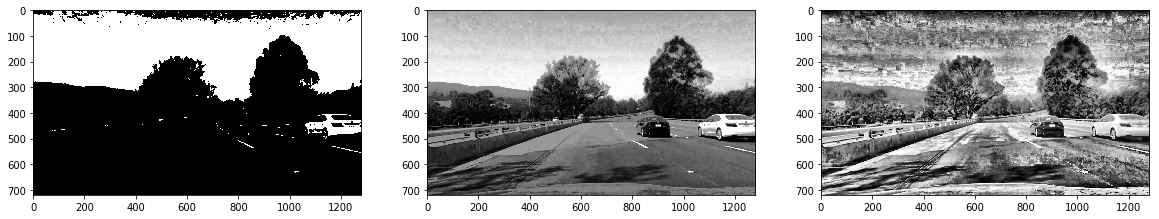

In [288]:
def threshold(image, thresh=(0, 255)):
    img      = image
    sbinary = np.zeros_like(img)
    sbinary[(img > thresh[0]) & (img <= thresh[1])] = 1
    return sbinary

hsv = img.copy()
clahe = cv2.createCLAHE(clipLimit=-0.004, tileGridSize=(8,8))
cl1 = clahe.apply(img[:,:,2])
b   = cv2.equalizeHist(img[:,:,2])
g   = threshold(b,(170,255))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(threshold(b,(170,255)), cmap='gray')
ax2.imshow(b,cmap='gray')
ax3.imshow(cl1,cmap='gray')

[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


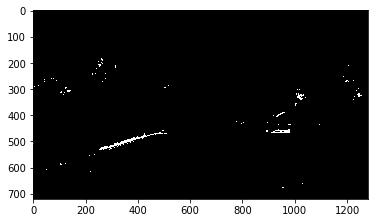

In [289]:

gray   = cv2.cvtColor(frame1, cv2.COLOR_RGB2GRAY)
th_img = cv2.adaptiveThreshold(gray, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 105,60)
plt.imshow(1-th_img, cmap='gray')
print(th_img)

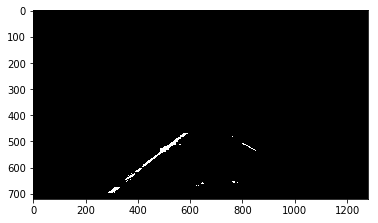

In [147]:
S_bin =  color_threshold(img, color=cv2.COLOR_RGB2HLS,channel=2, thresh=(180, 255))
L_bin =  color_threshold(img, color=cv2.COLOR_RGB2LUV,channel=0, thresh=(225, 255))
B_bin =  color_threshold(img, color=cv2.COLOR_RGB2HSV,channel=2, thresh=(220, 255))
combin= np.zeros_like(S_bin)
combin[(S_bin==1) | (L_bin==1) | (B_bin==1)]= 1
plt.figure()
plt.imshow(region_of_interest(combin,src),cmap='gray')
 

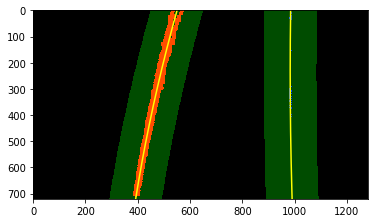

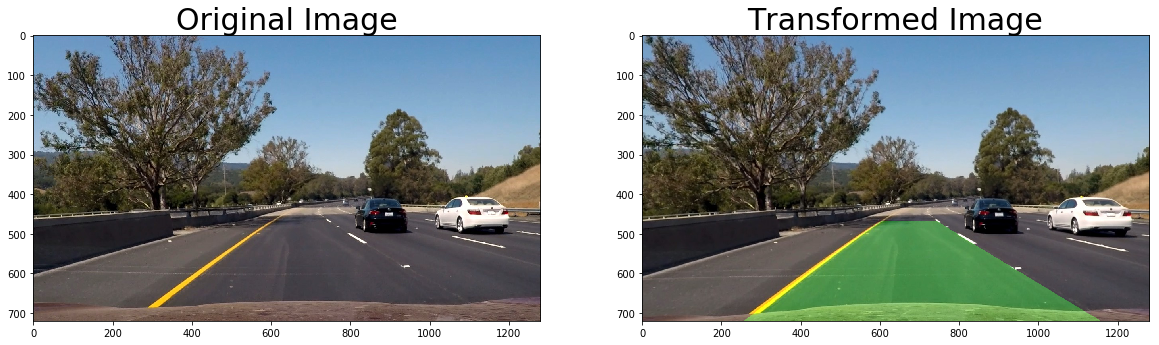

In [35]:
image        = plt.imread("./test_images/test6.jpg")
detection = LaneDetection(camera)
marked_image = detection.mark_lane(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(marked_image)
ax2.set_title('Transformed Image', fontsize=30)

In [27]:
id = 1
detection = LaneDetection(camera)
##detection.mark_lane(image)
def process_frame(image):
    global detection
    img = detection.camera.undistort(image)
    image_size    = (img.shape[1], img.shape[0])
    #bin_image = gradients(img)
    #bin_image = region_of_interest(bin_image, detection.src)
    bin_image = cv2.warpPerspective(img, detection.M, image_size, flags=cv2.INTER_LINEAR)
    return bin_image
#plt.imshow(process_frame(image))

count = 1
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(lambda image: detection.mark_lane(image))
#processed_video = video_input1.fl_image(lambda image: process_frame(image))
processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4



 23%|██▎       | 294/1261 [00:25<01:16, 12.63it/s]


 45%|████▌     | 570/1261 [00:49<01:25,  8.10it/s]


 67%|██████▋   | 845/1261 [01:13<00:35, 11.87it/s]


 86%|████████▌ | 1083/1261 [01:35<00:21,  8.45it/s]


100%|█████████▉| 1260/1261 [01:52<00:00, 11.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

